In [192]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Pulling in dataset from data.csv. Dataset consists of 570 entries with 32 features each. Below we describe features and entries in dataset as well as numerical characteristics of features. 

In [193]:
data_df = pd.read_csv('data.csv')

In [194]:
print(data_df.columns.values)
data_df.head()
data_df.tail()
data_df.info()
print('_'*40)
data_df.describe()

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compac

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [195]:
list(data_df)
data_df = data_df.drop('Unnamed: 32', axis=1)
data_df['diagnosis'] = data_df['diagnosis'].map( {'B': 0, 'M': 1} ).astype(int)
#Benign = 1, Malignant = 0
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Below we begin to visualize the data and first-glance correlations between outcomes and features.

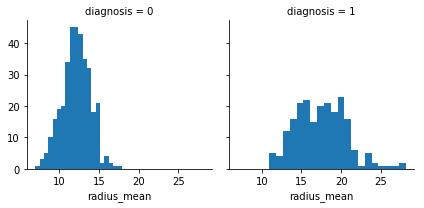

In [196]:
# g = sns.FacetGrid(data_df, col='diagnosis')
# for col in data_df.columns.values:
#     if col != 'id' and col != 'diagnosis':
#         g.map(plt.hist, col, bins=20)
        
g = sns.FacetGrid(data_df, col='diagnosis')
g.map(plt.hist, 'radius_mean', bins=20)
g.savefig('plot4.png')

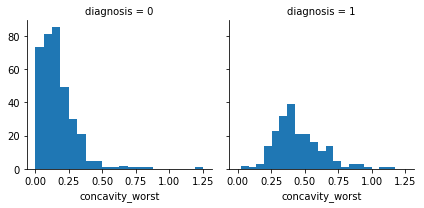

In [197]:
g = sns.FacetGrid(data_df, col='diagnosis')
g.map(plt.hist, 'concavity_worst', bins=20)
g.savefig('plot3.png')

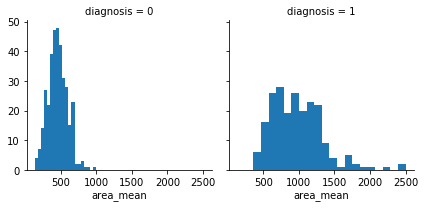

In [198]:
g = sns.FacetGrid(data_df, col='diagnosis')
g.map(plt.hist, 'area_mean', bins=20)
g.savefig('plot1.png')

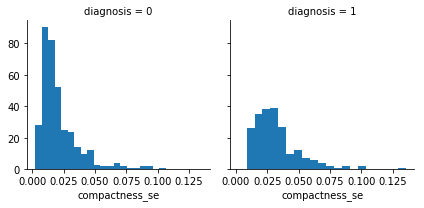

In [199]:
g = sns.FacetGrid(data_df, col='diagnosis')
g.map(plt.hist, 'compactness_se', bins=20)
g.savefig('plot2.png')

Here we drop unrelated and unnecesary columns from our training/test sets. Namely, ID (which is randomly generated numerical value and the class column, Malignant or Benign). Additionally we transform the Malignant/Benign column into a binary column with a 1 (Benign) or 0 (Malignant) and then create our y_train/test (a vector of classifications).

In [200]:
testdataset = data_df
testdataset = testdataset.drop("diagnosis", axis = 1).copy()
testdataset = testdataset.drop("id", axis = 1).copy()
print(testdataset.shape)

y = data_df.diagnosis
x_train, x_test, y_train, y_test = train_test_split(data_df, y, test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

x_train = x_train.drop("diagnosis", axis = 1).copy()
x_test = x_test.drop("diagnosis", axis = 1).copy()
x_train = x_train.drop("id", axis = 1).copy()
x_test = x_test.drop("id", axis = 1).copy()

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

print(x_train.head())

(569, 30)
(455, 32) (455,)
(114, 32) (114,)
(455, 30) (455,)
(114, 30) (114,)
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
17         16.13         20.68          108.10      798.8          0.11700   
344        11.71         15.45           75.03      420.3          0.11500   
309        13.05         13.84           82.71      530.6          0.08352   
228        12.62         23.97           81.35      496.4          0.07903   
223        15.75         20.25          102.60      761.3          0.10250   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
17            0.20220        0.172200             0.102800         0.2164   
344           0.07281        0.040060             0.032500         0.2009   
309           0.03735        0.004559             0.008829         0.1453   
228           0.07529        0.054380             0.020360         0.1514   
223           0.12040        0.114700             0.064620         0

In [201]:
print(x_train.shape)
print(testdataset.shape)

(455, 30)
(569, 30)


Below we run a number of supervised classification models: Logistic Regression, KMeans, SVM, and Decision Trees.
Logistic Regression rendered the best results out of the model we compared. Below we display the resulting  
correlations between each feature and the outcome from Logistic Regression. 

In [202]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

96.49

In [203]:
data = data_df.drop("diagnosis", axis=1)

coeff_df = pd.DataFrame(data.columns.delete(0))
coeff_df.columns = ['feat.']
coeff_df["corr"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='corr', ascending=False)



,feat.,corr
26,concavity_worst,1.410915
25,compactness_worst,1.047015
27,concave points_worst,0.614003
28,symmetry_worst,0.593464
6,concavity_mean,0.574171
5,compactness_mean,0.363415
7,concave points_mean,0.317013
21,texture_worst,0.293047
24,smoothness_worst,0.263345
8,symmetry_mean,0.167987


<class 'pandas.core.series.Series'>
FP: 1 FN: 3 TP: 40 TN: 70


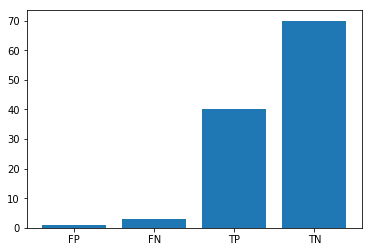

In [204]:
#print false positives and negatives 
print(type(y_test))
#print(pred)

i = 0
FN = 0
FP = 0
TP = 0
TN = 0
for p in pred:
    if p == y_test.iloc[i]:
        #print("yay")
        if(p == 1):
            #print("TN")
            TP += 1
        elif (p == 0):
            #print("TP")
            TN += 1
    else:
        #print("boo")
        if(p == 1):
            #print("FN")
            FP += 1
        elif (p == 0):
            #print("FP")
            FN += 1
        
    i += 1
    
print("FP: " + str(FP) + " FN: " + str(FN) + " TP: " + str(TP) + " TN: " + str(TN))


DayOfWeekOfCall = [1,2,3,4]
DispatchesOnThisWeekday = [FP, FN, TP, TN]

LABELS = ["FP", "FN", "TP", "TN"]

plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.show()

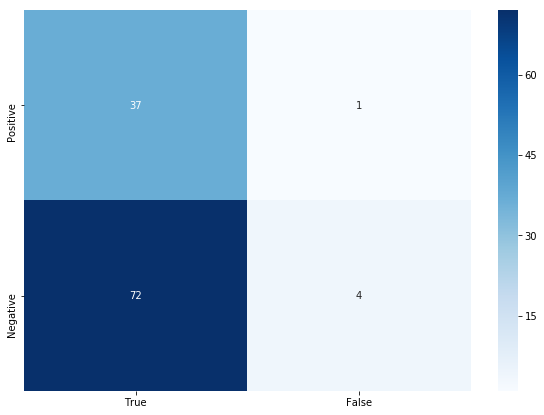

In [205]:
array = [[37,1],[72,4]]
df_cm = pd.DataFrame(array, index = [i for i in ["Positive", "Negative"]],
                  columns = [i for i in ["True","False"]])
plt.figure(figsize = (10,7))

please = sns.heatmap(df_cm, annot=True, cmap="Blues")

In [206]:
# Decision Tree

decision_tree = DecisionTreeClassifier(min_samples_split = 2, random_state = 22)
decision_tree.fit(x_train, y_train)
dec_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree)



93.86


In [207]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

62.28

In [208]:
knn = KNeighborsClassifier(n_neighbors = 225)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
acc_knn

86.84

In [209]:
testdataset = data_df.drop("diagnosis", axis = 1).copy()
testdataset = testdataset.drop("id", axis = 1).copy()
print(testdataset.shape)
print(x_test.shape)

#Dimensionality reduction using PCA LOGREG

best_num_vectors = 0
best_pca_log_reg_acc = 0

log_train_img_foruse = 0
log_test_img_foruse = 0

best_score = 0
best_vec_pca = 0

for i in range(1, 6):
    num_vectors = 5*i
    pca = PCA(num_vectors)
    pca.fit(x_train)
    pca.n_components_

    log_train_img = pca.transform(x_train)
    log_test_img = pca.transform(x_test)
    
    #pca test dataset for cross validation
    log_train_img_foruse = pca.transform(testdataset)
    
    pca_log_reg = LogisticRegression()
    pca_log_reg_cv = LogisticRegression()
    pca_log_reg.fit(log_train_img, y_train)
    
    acc_pca_log_reg = round(pca_log_reg.score(log_test_img, y_test) * 100, 2)
    
    
    ################### CV ########################
    
    scores = cross_val_score(pca_log_reg_cv, log_train_img_foruse, y, cv=5)
#     print("PCA Cross-validated scores:", str(scores))
#     print("PCA Cross-validated average accuracy:", str(np.average(scores)))
    
    if np.average(scores) > best_score:
        best_score = np.average(scores)
        best_vec_pca = num_vectors

    ################### CV ########################
    
    if acc_pca_log_reg > best_pca_log_reg_acc:
        best_pca_log_reg_acc = acc_pca_log_reg
        best_num_vectors = num_vectors
print("CV best number of components: " + str(best_vec_pca))
print("CV best accuracy achieved: " + str(best_score))

print("best number of components: " + str(best_num_vectors))
print("best accuracy achieved: " + str(best_pca_log_reg_acc))


(569, 30)
(114, 30)
CV best number of components: 15
CV best accuracy achieved: 0.9508426317814542
best number of components: 5
best accuracy achieved: 97.37


In [210]:
#Dimensionality reduction using PCA DT
best_num_vectors = 0
best_pca_decision_tree_acc = 0
dt_train_img_foruse = 0

best_score = 0
best_vec_pca = 0

for i in range(1, 6):
    num_vectors = 5*i
    pca = PCA(num_vectors)
    pca.fit(x_train)
    pca.n_components_

    train_img = pca.transform(x_train)
    test_img = pca.transform(x_test)
    
    #pca test dataset
    dt_train_img_foruse = pca.transform(testdataset)

    pca_decision_tree = DecisionTreeClassifier()
    pca_decision_tree_cv = DecisionTreeClassifier()
    pca_decision_tree.fit(train_img, y_train)
    acc_pca_decision_tree = round(pca_decision_tree.score(test_img, y_test) * 100, 2)
    
    ################### CV ########################


    scores = cross_val_score(pca_decision_tree_cv, dt_train_img_foruse, y, cv=5)
#     print("PCA Cross-validated scores:", str(scores))
#     print("PCA Cross-validated average accuracy:", str(np.average(scores)))
    
    if np.average(scores) > best_score:
        best_score = np.average(scores)
        best_vec_pca = num_vectors

    ################### CV ########################
    
    if acc_pca_decision_tree > best_pca_decision_tree_acc:
        best_pca_decision_tree_acc = acc_pca_decision_tree
        best_num_vectors = num_vectors
        
print("CV best number of components:" + str(best_vec_pca))
print("CV best accuracy achieved: " + str(best_score))

print("best number of components: " + str(best_num_vectors))
print("best accuracy achieved: " + str(best_pca_decision_tree_acc))


CV best number of components:5
CV best accuracy achieved: 0.9209696036937283
best number of components: 10
best accuracy achieved: 97.37


In [211]:
#Dimensionality reduction using PCA knn
best_num_vectors = 0
best_pca_knn_acc = 0
knn_train_img_foruse = 0

best_score = 0
best_vec_pca = 0

for i in range(1, 6):
    num_vectors = 5*i
    pca = PCA(num_vectors)
    pca.fit(x_train)
    pca.n_components_

    train_img = pca.transform(x_train)
    test_img = pca.transform(x_test)
    
    #pca test dataset for use in cross validation
    knn_train_img_foruse = pca.transform(testdataset)
    

    pca_knn = KNeighborsClassifier(n_neighbors = 6)
    pca_knn_cv = KNeighborsClassifier(n_neighbors = 6)
    pca_knn.fit(train_img, y_train)
    acc_pca_knn = round(pca_knn.score(test_img, y_test) * 100, 2)
    
    ################### CV ########################


    scores = cross_val_score(pca_knn_cv, knn_train_img_foruse, y, cv=5)
#     print("PCA Cross-validated scores:", str(scores))
#     print("PCA Cross-validated average accuracy:", str(np.average(scores)))
    
    if np.average(scores) > best_score:
        best_score = np.average(scores)
        best_vec_pca = num_vectors

    ################### CV ########################
    
    if acc_pca_knn > best_pca_knn_acc:
        best_pca_knn_acc = acc_pca_knn
        best_num_vectors = num_vectors

print("CV best number of components:" + str(best_vec_pca))
print("CV best accuracy achieved: " + str(best_score))
        
print("best number of components: " + str(best_num_vectors))
print("best accuracy achieved: " + str(best_pca_knn_acc))


CV best number of components:5
CV best accuracy achieved: 0.9210619469026549
best number of components: 5
best accuracy achieved: 92.98


In [212]:
#Dimensionality reduction using PCA: SVC
best_num_vectors = 0
best_pca_svc_acc = 0
svc_train_img_foruse = 0
pca_svc_forcv = 0

best_score = 0
best_vec_pca = 0

for i in range(1, 6):
    num_vectors = 5*i
    pca = PCA(num_vectors)
    pca.fit(x_train)
    pca.n_components_

    train_img = pca.transform(x_train)
    test_img = pca.transform(x_test)
    
    #pca test dataset
    svc_train_img_foruse = pca.transform(testdataset)
    
    pca_svc = SVC()
    pca_svc_cv = SVC()
    pca_svc.fit(train_img, y_train)
    acc_pca_svc = round(pca_svc.score(test_img, y_test) * 100, 2)
    
    ################### CV ########################


    scores = cross_val_score(pca_svc_cv, svc_train_img_foruse, y, cv=5)
#     print("PCA Cross-validated scores:", str(scores))
#     print("PCA Cross-validated average accuracy:", str(np.average(scores)))
    
    if np.average(scores) > best_score:
        best_score = np.average(scores)
        best_vec_pca = num_vectors

    ################### CV ########################
    
    if acc_pca_svc > best_pca_svc_acc:
        best_pca_svc_acc = acc_pca_svc
        best_num_vectors = num_vectors
        

print("CV best number of components:" + str(best_vec_pca))
print("CV best accuracy achieved: " + str(best_score))

print("best number of components: " + str(best_num_vectors))
print("best accuracy achieved: " + str(best_pca_svc_acc))



CV best number of components:5
CV best accuracy achieved: 0.6274259330511736
best number of components: 5
best accuracy achieved: 62.28


We validated our results by applying 5-fold cross validation to each of our models and averaging 
the respective accuracies. Logistis Regression consistently resulted in the highest accuracy (at 0.951) 
with Decision Trees at a close second (at 0.919).

In [228]:
#5-fold cross validation on regular logreg model

scores = cross_val_score(logreg, testdataset, y, cv=5)
print("Cross-validated scores:", str(scores))
print("Cross-validated average accuracy:", str(np.average(scores)))

#5-fold cross validation after PCA
# testdataset = data_df.drop("diagnosis", axis = 1).copy()
# testdataset = testdataset.drop("id", axis = 1).copy()


Cross-validated scores: [0.93043478 0.93913043 0.97345133 0.94690265 0.96460177]
Cross-validated average accuracy: 0.9509041939207385


In [214]:
#5-fold cross validation on regular knn model

scores = cross_val_score(knn, testdataset, y, cv=5)
print("Cross-validated scores:", str(scores))
print("Cross-validated average accuracy:", str(np.average(scores)))


Cross-validated scores: [0.8173913  0.84347826 0.85840708 0.89380531 0.90265487]
Cross-validated average accuracy: 0.863147364370912


In [215]:
scores = cross_val_score(svc, testdataset, y, cv=5)
print("Cross-validated scores:", str(scores))
print("Cross-validated average accuracy:", str(np.average(scores)))


# scores = cross_val_score(pca_svc_forcv, svc_train_img_foruse, y, cv=5)
# print("PCA Cross-validated scores:", str(scores))
# print("PCA Cross-validated average accuracy:", str(np.average(scores)))

Cross-validated scores: [0.62608696 0.62608696 0.62831858 0.62831858 0.62831858]
Cross-validated average accuracy: 0.6274259330511736


In [216]:
scores = cross_val_score(decision_tree, testdataset, y, cv=5)
print("Cross-validated scores:", str(scores))
print("Cross-validated average accuracy:", str(np.average(scores)))

# scores = cross_val_score(pca_decision_tree, dt_train_img_foruse, y, cv=5)
# print("PCA Cross-validated scores:", str(scores))
# print("PCA Cross-validated average accuracy:", str(np.average(scores)))

Cross-validated scores: [0.91304348 0.90434783 0.92920354 0.95575221 0.89380531]
Cross-validated average accuracy: 0.9192304732589458
